In [1]:
import pandas as pd

# Load the data AnnoMI-full.csv into a data frame
df = pd.read_csv('AnnoMI-full.csv')

In [2]:
df.shape

(13551, 18)

In [2]:
# Make a new data frame where the topic is 'reducing alcohol consumption'

df_alcohol = df[df['topic'] == 'reducing alcohol consumption']

In [3]:
# Count the total number of data points in the df_alcohol data frame

df_alcohol.shape

(2326, 18)

In [4]:
# Make two data frames one for theraripst's utterances and one for client's utterances

# For the therapist's utterances when in the column interlocutor is 'therapist' take the utterance_text 
# from those rows and put them in a new data frame called df_alcohol_therapist

df_alcohol_therapist = df_alcohol[df_alcohol['interlocutor'] == 'therapist']

df_alcohol_client = df_alcohol[df_alcohol['interlocutor'] == 'client']

In [5]:
df_alcohol_therapist.head()

,mi_quality,transcript_id,video_title,video_url,topic,utterance_id,interlocutor,timestamp,utterance_text,annotator_id,therapist_input_exists,therapist_input_subtype,reflection_exists,reflection_subtype,question_exists,question_subtype,main_therapist_behaviour,client_talk_type
0,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,0,therapist,00:00:13,Thanks for filling it out. We give this form t...,3,False,NaN,False,NaN,True,open,question,NaN
2,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,2,therapist,00:00:25,"So, let's see. It looks that you put-- You dri...",3,True,information,False,NaN,False,NaN,therapist_input,NaN
4,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,4,therapist,00:00:34,-and you usually have three to four drinks whe...,3,True,information,False,NaN,False,NaN,therapist_input,NaN
6,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,6,therapist,00:00:42,Okay. That's at least 12 drinks a week.,3,True,information,False,NaN,False,NaN,therapist_input,NaN
8,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,8,therapist,00:00:47,"Okay. Just so you know, my role, um, when we t...",3,True,information,False,NaN,False,NaN,therapist_input,NaN


In [6]:
df_alcohol_client.head()

,mi_quality,transcript_id,video_title,video_url,topic,utterance_id,interlocutor,timestamp,utterance_text,annotator_id,therapist_input_exists,therapist_input_subtype,reflection_exists,reflection_subtype,question_exists,question_subtype,main_therapist_behaviour,client_talk_type
1,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,1,client,00:00:24,Sure.,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
3,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,3,client,00:00:34,Mm-hmm.,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
5,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,5,client,00:00:39,Usually three drinks and glasses of wine.,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
7,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,7,client,00:00:46,Something like that.,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
9,high,0,"NEW VIDEO: Brief intervention: ""Barbara""",https://www.youtube.com/watch?v=PaSKcfTmFEk,reducing alcohol consumption,9,client,00:01:03,Okay.,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral


In [7]:
df_alcohol_client.shape

(1156, 18)

In [8]:
# Count the number of nan on utterance_text column in df_alcohol_client

df_alcohol_client['utterance_text'].isna().sum()

0

In [9]:
# Count the number of nan on client_text_type

df_alcohol_client['client_talk_type'].isna().sum()

0

<Axes: ylabel='count'>

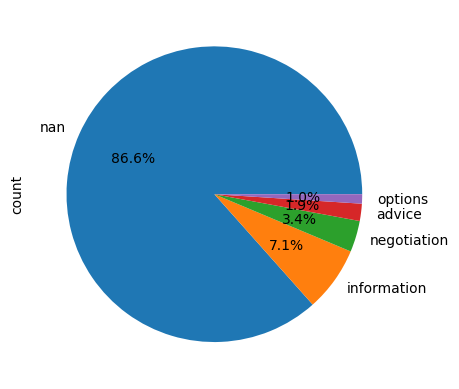

In [10]:
# Plot therapist_input_subtype in a pie chart with percentages also including NaN values

df_alcohol_therapist['therapist_input_subtype'].value_counts(dropna=False).plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='count'>

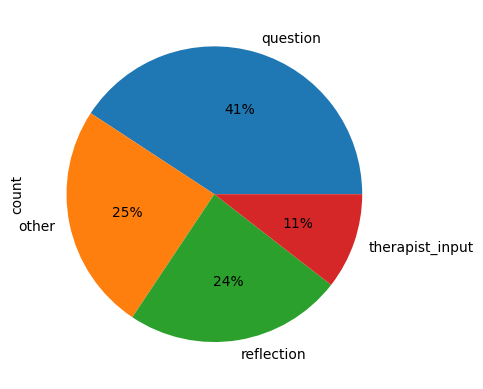

In [11]:
# Plot main_therapist_behaviour	in a pie chart with percentages

df_alcohol_therapist['main_therapist_behaviour'].value_counts(dropna=False).plot(kind='pie', autopct='%1.0f%%')

<Axes: ylabel='count'>

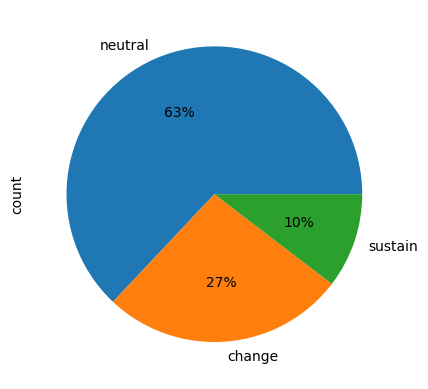

In [12]:
# Plot a pie chart of the client_talk_type column

df_alcohol_client['client_talk_type'].value_counts(dropna=False).plot(kind='pie', autopct='%1.0f%%')

In [13]:
# in df_alcohol_client get rid of the rows where for the same utterance_text the value of client_talk_type is same
# and keep the first one

# df_alcohol_client = df_alcohol_client.drop_duplicates(subset=['utterance_text', 'client_talk_type'], keep='first')

In [1]:
import torch
from transformers import BertForSequenceClassification, BertTokenizer

In [2]:
torch.version.cuda

'11.8'

In [3]:
torch.cuda.is_available()

True

In [4]:
# Load the BERT tokenizer and model

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

model_path = "/userdata/hossain/annomi_classification/pretrained_models/"

model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    cache_dir=model_path,
    num_labels = 3,  # The number of output labels -> 3.
    output_attentions = False,  # Whether the model returns attentions weights.
    output_hidden_states = False,  # Whether the model returns all hidden-states.
)

# model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

In [ ]:
# from transformers import RobertaTokenizer, RobertaForSequenceClassification

# tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# model_path = "/userdata/hossain/annomi_classification/pretrained_models/"

# model = RobertaForSequenceClassification.from_pretrained(
#     'roberta-base',
#     cache_dir=model_path,
#     num_labels = 3,  # The number of output labels -> 3.
#     output_attentions = False,  # Whether the model returns attentions weights.
#     output_hidden_states = False,  # Whether the model returns all hidden-states.
# )

In [16]:
# Check if a GPU is available and if not, we'll use a CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [11]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [ ]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Define the K-fold Cross Validator
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2022)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = []
for train, val in kfold.split(df_alcohol_client['utterance_text'], df_alcohol_client['client_talk_type']):
    
    print(f'Training for fold {fold_no} ...')
    
    # Split the data
    train_text, val_text = df_alcohol_client['utterance_text'].iloc[train], df_alcohol_client['utterance_text'].iloc[val]
    train_labels, val_labels = df_alcohol_client['client_talk_type'].iloc[train], df_alcohol_client['client_talk_type'].iloc[val]
    
    # Fit the label encoder and transform the labels
    train_labels = label_encoder.fit_transform(train_labels)
    val_labels = label_encoder.transform(val_labels)
    
    # Tokenize the text
    train_encodings = tokenizer(train_text.tolist(), truncation=True, padding=True, max_length=512)
    val_encodings = tokenizer(val_text.tolist(), truncation=True, padding=True, max_length=512)
    
    # Convert the encodings and the labels to tensors
    train_input_ids = torch.tensor(train_encodings['input_ids'])
    train_attention_mask = torch.tensor(train_encodings['attention_mask'])
    train_labels = torch.tensor(train_labels)

    val_input_ids = torch.tensor(val_encodings['input_ids'])
    val_attention_mask = torch.tensor(val_encodings['attention_mask'])
    val_labels = torch.tensor(val_labels)
    
    # Create the DataLoader for our training set
    train_data = TensorDataset(train_input_ids, train_attention_mask, train_labels)
    train_sampler = RandomSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler)

    # Create the DataLoader for our validation set
    val_data = TensorDataset(val_input_ids, val_attention_mask, val_labels)
    val_sampler = SequentialSampler(val_data)
    val_dataloader = DataLoader(val_data, sampler=val_sampler)
    
    # Training and Evaluation code here
    # Put model in evaluation mode
    model.eval()

    # Tracking variables 
    predictions, true_labels = [], []

    # Predict 
    for batch in val_dataloader:
      # Add batch to device
      batch = tuple(t.to(device) for t in batch)
    
      # Unpack the inputs from our dataloader
      b_input_ids, b_input_mask, b_labels = batch
    
      # Telling the model not to compute or store gradients, saving memory and speeding up prediction
      with torch.no_grad():
          # Forward pass, calculate logit predictions
          outputs = model(b_input_ids, token_type_ids=None, 
                          attention_mask=b_input_mask)

      logits = outputs[0]

      # Move logits and labels to CPU
      logits = logits.detach().cpu().numpy()
      label_ids = b_labels.to('cpu').numpy()
    
      # Store predictions and true labels
      predictions.append(logits)
      true_labels.append(label_ids)

    
    # Generate a prediction based on the model's response
    flat_predictions = np.concatenate(predictions, axis=0)
    flat_true_labels = np.concatenate(true_labels, axis=0)
    predicted_labels = np.argmax(flat_predictions, axis=1)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(flat_true_labels, predicted_labels)
    print(f'Score for fold {fold_no}: {accuracy}')
    print(classification_report(flat_true_labels, predicted_labels, zero_division=0))
    acc_per_fold.append(accuracy)
    
    fold_no = fold_no + 1

# Average accuracy
print('Average accuracy', np.mean(acc_per_fold))


Training for fold 1 ...
Score for fold 1: 0.6077586206896551
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        62
           1       0.62      0.96      0.76       146
           2       0.12      0.04      0.06        24

    accuracy                           0.61       232
   macro avg       0.25      0.33      0.27       232
weighted avg       0.41      0.61      0.48       232

Training for fold 2 ...
Score for fold 2: 0.6147186147186147
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.63      0.97      0.76       146
           2       0.00      0.00      0.00        24

    accuracy                           0.61       231
   macro avg       0.21      0.32      0.25       231
weighted avg       0.40      0.61      0.48       231

Training for fold 3 ...
Score for fold 3: 0.6060606060606061
              precision    recall  f1-score   support

